# Libraries to import

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge, RidgeCV,Lasso
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from IPython import display

import warnings
warnings.filterwarnings('ignore')



In [2]:
import sys  
sys.path.insert(0, 'C:/Users/Florina/Desktop/allwomen/DS_2021/functions')

from Functions_EDA import *
from fx_MLRegression import *
#from fx_MLClassification import *

# RandomForest Feature Importance Model!

In [3]:
df = pd.read_csv('../datasets/P2_rdn.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,YearBuilt,BsmtFinSF1,LotArea,OverallCond,SalePrice_log
0,7,1710,2,856,548,856,2003,706,8450,5,12.247694
1,6,1262,2,1262,460,1262,1976,978,9600,8,12.109011
2,7,1786,2,920,608,920,2001,486,11250,5,12.317167
3,7,1717,3,756,642,961,1915,216,9550,5,11.849398
4,8,2198,3,1145,836,1145,2000,655,14260,5,12.429216
...,...,...,...,...,...,...,...,...,...,...,...
1354,7,1221,2,1221,400,1221,2004,410,7500,5,12.128111
1355,6,1647,2,953,460,953,1999,0,7917,5,12.072541
1356,7,2340,1,1152,252,1188,1941,275,9042,9,12.493130
1357,5,1078,1,1078,240,1078,1950,49,9717,6,11.864462


### Define the target and non-target vars, together with the train_test split

In [4]:
X = df.drop(['SalePrice_log'], axis=1)
y = df['SalePrice_log']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=42)    

##  Multilinear Regression

### Train the model

In [5]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [6]:
X_test.head(2)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,YearBuilt,BsmtFinSF1,LotArea,OverallCond
51,5,1360,2,384,572,1360,1955,384,7134,5
1100,5,1343,1,731,186,820,1921,0,7681,6


In [7]:
y_pred = regressor.predict(X_test)
y_pred

array([11.68495918, 11.57320213, 12.03843078, 11.93504949, 11.60018018,
       11.97098471, 11.47494919, 12.56120134, 12.25994345, 11.73538756,
       11.90861666, 12.13943759, 11.76557419, 12.56264244, 12.67021077,
       12.26140659, 12.39501252, 12.46056151, 11.55108891, 11.97665058,
       12.35319266, 12.54435578, 11.57617973, 11.38414163, 12.78334109,
       12.17321754, 12.11494313, 12.34498533, 12.02687236, 12.36431093,
       12.2035995 , 11.99413136, 12.30046797, 11.66676688, 12.31845553,
       12.31901467, 11.68011184, 12.03044642, 11.82073646, 12.14260043,
       12.10589619, 11.88851306, 11.93886317, 12.97502843, 12.16972933,
       12.01358957, 11.72676711, 11.81923262, 12.52964103, 11.5698252 ,
       12.16996734, 11.90344191, 12.11530985, 11.60580984, 11.60436142,
       12.37137257, 11.92748362, 12.23326805, 12.25116854, 12.14883592,
       12.1423475 , 12.43292675, 12.4178249 , 11.84174558, 11.74303432,
       11.76332212, 12.39620501, 11.88493079, 11.89943139, 11.70

In [8]:
X_train.head(4)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,YearBuilt,BsmtFinSF1,LotArea,OverallCond
328,5,1111,1,616,200,616,1941,236,9084,6
1043,5,1040,1,1040,286,1040,1959,369,7560,5
318,8,1908,2,967,431,993,2002,0,14191,5
1208,5,1246,1,1246,305,1246,1959,340,7500,7


In [9]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([11.58044005, 11.64229684, 12.33176472, 11.87388341, 11.63004879,
       12.19335945, 11.98885054, 11.7134464 , 12.05890513, 12.08633696,
       11.78702751, 11.63828116, 12.26392772, 11.69574753, 12.12104876,
       12.13880655, 11.47818379, 12.62290599, 12.04828257, 12.11511961,
       11.96235343, 12.42637797, 11.75534116, 12.54223948, 12.48627536,
       12.63078279, 12.07880022, 11.71188708, 12.22962981, 11.5184896 ,
       12.1892938 , 12.24606234, 11.67401085, 11.31074254, 12.48154647,
       11.91584856, 11.66952601, 11.7470768 , 12.16242944, 11.79318587,
       12.75806616, 12.00418182, 12.10652209, 12.27516184, 11.87972617,
       11.63900145, 12.11602369, 12.18259587, 11.66697935, 12.16430684,
       10.93298862, 12.03337309, 11.3762715 , 12.17645444, 11.56388177,
       11.55462886, 11.59225428, 11.72609643, 11.99157508, 11.46538683,
       12.29236916, 11.79013332, 12.46320725, 11.71542017, 12.84192562,
       11.88006656, 12.17678354, 12.02674962, 11.51158507, 11.71

### Evaluate the model
#### Check it's coefficients and how we can interpret them.

In [10]:
accuracy = regressor.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.8871661948740268


#### Visualization of the predicted values vs real values

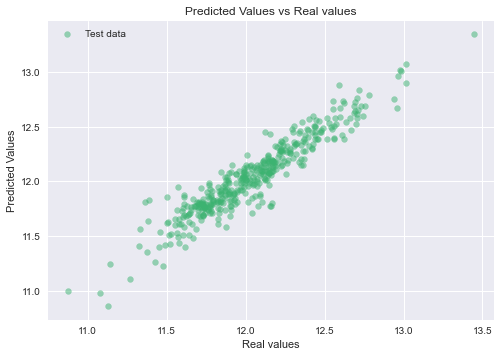

In [11]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

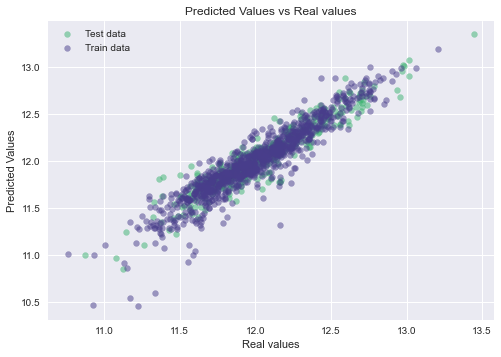

In [12]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.scatter(y_pred_train, y_train, color = 'darkslateblue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

#### [TEST] set

In [13]:
# TEST set
MAE_l = metrics.mean_absolute_error(y_test, y_pred)
MSE_l = metrics.mean_squared_error(y_test, y_pred)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_l = r2_score(y_test, y_pred)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_l)

MAE: 0.08935827774020448
MSE: 0.014011592523079944
RMSE: 0.118
R2 Score: 0.8871661948740268


In [14]:
#metrics_test(X_test, y_test, rr_)

#### [TRAIN] Cross-Validation

In [15]:
from sklearn.model_selection import cross_val_score
import math

cv_reg_model = LinearRegression() #Let's initialize the method 

cv_scores = cross_val_score(cv_reg_model, X_train, y_train,
                            cv=10, scoring='r2') # Let's define the cv and 

print('Cross Validation R2_score: {}'.format(cv_scores.round(2)))

cv_scores = np.mean(cv_scores).round(3)
print("\nAverage 10-Fold CV R2_score: {}".format(cv_scores))

Cross Validation R2_score: [0.92 0.88 0.88 0.88 0.85 0.82 0.89 0.87 0.84 0.85]

Average 10-Fold CV R2_score: 0.867


#### [TRAIN] set

In [16]:
# Let's calculate the metrics with our TRAIN dataset
y_predTrain = regressor.predict(X_train)

MAE_lTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_lTrain = r2_score(y_train, y_predTrain)

print('\n TRAIN metrics\n')
print('MAE:', round(MAE_lTrain,3))
print('MSE:', round(MSE_lTrain,3))
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', round(R2_lTrain,3))

print('\n CV- TRAIN metrics\n')
print('R2 Score:', cv_scores)

print('\n TEST metrics\n')
print('MAE:', round(MAE_l,3))
print('MSE:', round(MSE_l,3))
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', round(R2_l,3))


 TRAIN metrics

MAE: 0.096
MSE: 0.018
RMSE: 0.135
R2 Score: 0.874

 CV- TRAIN metrics

R2 Score: 0.867

 TEST metrics

MAE: 0.089
MSE: 0.014
RMSE: 0.118
R2 Score: 0.887


##  RandomForest Regression

### Train & fit the model

In [17]:
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor(n_estimators=100)
rand_forest.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
X_train.head(2)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,YearBuilt,BsmtFinSF1,LotArea,OverallCond
328,5,1111,1,616,200,616,1941,236,9084,6
1043,5,1040,1,1040,286,1040,1959,369,7560,5


In [19]:
X_test.head(2)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,YearBuilt,BsmtFinSF1,LotArea,OverallCond
51,5,1360,2,384,572,1360,1955,384,7134,5
1100,5,1343,1,731,186,820,1921,0,7681,6


In [20]:
y_pred = rand_forest.predict(X_test)

In [21]:
y_pred_train = rand_forest.predict(X_train)

In [22]:
from sklearn.model_selection import GridSearchCV
rand_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,6,8],
   'criterion' :['mse', 'mae']
}
GSCV = GridSearchCV(estimator=rand_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(X_train, y_train)
GSCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [23]:
GSCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [24]:
rand_forest = RandomForestRegressor(random_state = 42, 
                                    n_estimators=500,max_features='sqrt', max_depth=8, criterion='mse' )
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)

### Evaluate the model
#### Check it's coefficients and how we can interpret them.

In [25]:
accuracy = rand_forest.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.8824012445705317


In [26]:
#metrics_train(X_train, y_train, rr_)

In [27]:
#metrics_test(X_test, y_test, rr_)

In [28]:
#Allmetrics(rr_, X_train, y_train, X_test, y_test)

#### Visualization of the predicted values vs real values

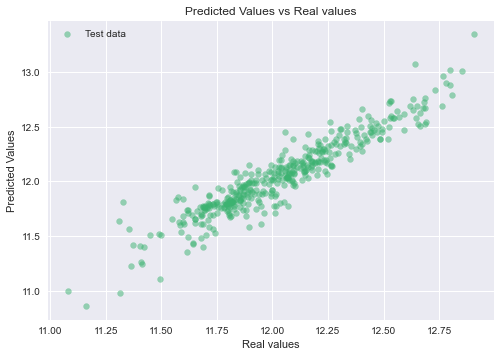

In [29]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

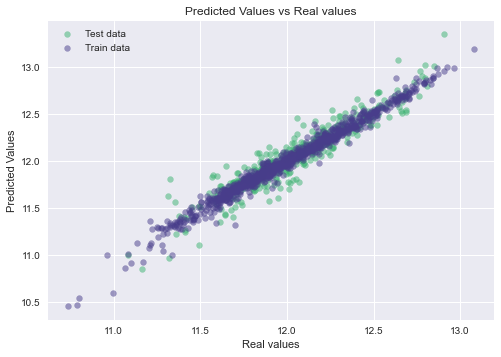

In [30]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.scatter(y_pred_train, y_train, color = 'darkslateblue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

#### [TEST] set

In [31]:
# TEST set
MAE_l = metrics.mean_absolute_error(y_test, y_pred)
MSE_l = metrics.mean_squared_error(y_test, y_pred)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_l = r2_score(y_test, y_pred)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,5))
print('R2 Score:', R2_l)

MAE: 0.08918944313189843
MSE: 0.014603299431933718
RMSE: 0.12084
R2 Score: 0.8824012445705317


#### [TRAIN] Cross-Validation

In [32]:
from sklearn.model_selection import cross_val_score
import math

cv_reg_model = RandomForestRegressor() #Let's initialize the method 

cv_scores = cross_val_score(cv_reg_model, X_train, y_train,
                            cv=10, scoring='r2') # Let's define the cv and 

print('Cross Validation R2_score: {}'.format(cv_scores.round(2)))

cv_scores = np.mean(cv_scores).round(3)
print("\nAverage 10-Fold CV R2_score: {}".format(cv_scores))

Cross Validation R2_score: [0.92 0.85 0.87 0.84 0.82 0.8  0.9  0.78 0.81 0.82]

Average 10-Fold CV R2_score: 0.841


#### [TRAIN] set

In [33]:
# Let's calculate the metrics with our TRAIN dataset
y_predTrain = rand_forest.predict(X_train)

MAE_lTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_lTrain = r2_score(y_train, y_predTrain)

print('\n TRAIN metrics\n')
print('MAE:', round(MAE_lTrain,3))
print('MSE:', round(MSE_lTrain,3))
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', round(R2_lTrain,3))

print('\n CV- TRAIN metrics\n')
print('R2 Score:', cv_scores)

print('\n TEST metrics\n')
print('MAE:', round(MAE_l,3))
print('MSE:', round(MSE_l,3))
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', round(R2_l,3))


 TRAIN metrics

MAE: 0.063
MSE: 0.007
RMSE: 0.086
R2 Score: 0.949

 CV- TRAIN metrics

R2 Score: 0.841

 TEST metrics

MAE: 0.089
MSE: 0.015
RMSE: 0.121
R2 Score: 0.882


##  Ridge Regression

### Train the model

In [34]:
# Hypertunning : Create ridge regression with three possible alpha values 
regr_cv = RidgeCV(alphas=[0.1,0.5, 1.0, 10.0])
regr_cv


RidgeCV(alphas=array([ 0.1,  0.5,  1. , 10. ]))

In [35]:
X_train.head(2)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,YearBuilt,BsmtFinSF1,LotArea,OverallCond
328,5,1111,1,616,200,616,1941,236,9084,6
1043,5,1040,1,1040,286,1040,1959,369,7560,5


In [36]:
# Fit the linear regression
model_cv = regr_cv.fit(X_train, y_train)
model_cv

RidgeCV(alphas=array([ 0.1,  0.5,  1. , 10. ]))

In [37]:
#View Best Model’s Alpha Value
model_cv.alpha_

10.0

In [38]:
regr_cv = RidgeCV(alphas=[10,15,18])

In [39]:
# Fit the linear regression
model_cv = regr_cv.fit(X_train, y_train)

#View Best Model’s Alpha Value
model_cv.alpha_

10

In [40]:
rr_ = Ridge(alpha = model_cv.alpha_, )# higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles

rr_.fit(X_train, y_train)

Ridge(alpha=10)

In [41]:
X_test.head(2)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,YearBuilt,BsmtFinSF1,LotArea,OverallCond
51,5,1360,2,384,572,1360,1955,384,7134,5
1100,5,1343,1,731,186,820,1921,0,7681,6


In [42]:
y_pred = rr_.predict(X_test)

In [43]:
X_train.head(2)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,YearBuilt,BsmtFinSF1,LotArea,OverallCond
328,5,1111,1,616,200,616,1941,236,9084,6
1043,5,1040,1,1040,286,1040,1959,369,7560,5


In [44]:
y_pred_train = rr_.predict(X_train)

### Evaluate the model
#### Check it's coefficients and how we can interpret them.

In [45]:
accuracy = rr_.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.8875476566480119


In [46]:
#metrics_train(X_train, y_train, rr_)

In [47]:
#metrics_test(X_test, y_test, rr_)

In [48]:
#Allmetrics(rr_, X_train, y_train, X_test, y_test)

#### Visualization of the predicted values vs real values

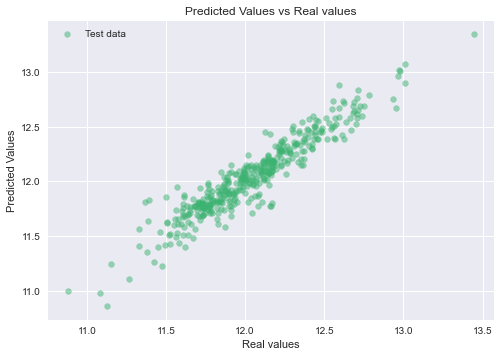

In [49]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

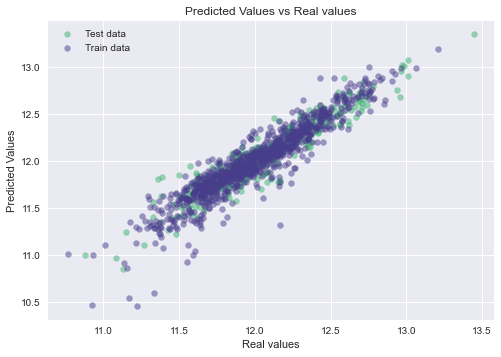

In [50]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.scatter(y_pred_train, y_train, color = 'darkslateblue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

#### [TEST] set

In [51]:
# TEST set
MAE_l = metrics.mean_absolute_error(y_test, y_pred)
MSE_l = metrics.mean_squared_error(y_test, y_pred)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_l = r2_score(y_test, y_pred)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_l)

MAE: 0.08911108163835235
MSE: 0.013964222969830858
RMSE: 0.118
R2 Score: 0.8875476566480119


#### [TRAIN] Cross-Validation

In [52]:
from sklearn.model_selection import cross_val_score
import math

cv_reg_model = Ridge() #Let's initialize the method 

cv_scores = cross_val_score(cv_reg_model, X_train, y_train,
                            cv=10, scoring='r2') # Let's define the cv and 

print('Cross Validation R2_score: {}'.format(cv_scores.round(2)))

cv_scores = np.mean(cv_scores).round(3)
print("\nAverage 10-Fold CV R2_score: {}".format(cv_scores))

Cross Validation R2_score: [0.92 0.88 0.88 0.88 0.85 0.82 0.9  0.87 0.84 0.85]

Average 10-Fold CV R2_score: 0.867


#### [TRAIN] set

In [53]:
# Let's calculate the metrics with our TRAIN dataset
y_predTrain = rr_.predict(X_train)

MAE_lTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_lTrain = r2_score(y_train, y_predTrain)

print('\n TRAIN metrics\n')
print('MAE:', round(MAE_lTrain,3))
print('MSE:', round(MSE_lTrain,3))
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', round(R2_lTrain,3))

print('\n CV- TRAIN metrics\n')
print('R2 Score:', cv_scores)

print('\n TEST metrics\n')
print('MAE:', round(MAE_l,3))
print('MSE:', round(MSE_l,3))
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', round(R2_l,3))


 TRAIN metrics

MAE: 0.096
MSE: 0.018
RMSE: 0.135
R2 Score: 0.874

 CV- TRAIN metrics

R2 Score: 0.867

 TEST metrics

MAE: 0.089
MSE: 0.014
RMSE: 0.118
R2 Score: 0.888


# DecisionTree Feature Importance Model!

In [54]:
df = pd.read_csv('../datasets/P2_cart.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,1stFlrSF,BsmtFinSF1,LotArea,CentralAir,OverallCond,SalePrice_log
0,7,1710,2003,2,856,856,706,8450,1,5,12.247694
1,6,1262,1976,2,1262,1262,978,9600,1,8,12.109011
2,7,1786,2001,2,920,920,486,11250,1,5,12.317167
3,7,1717,1915,3,756,961,216,9550,1,5,11.849398
4,8,2198,2000,3,1145,1145,655,14260,1,5,12.429216
...,...,...,...,...,...,...,...,...,...,...,...
1354,7,1221,2004,2,1221,1221,410,7500,1,5,12.128111
1355,6,1647,1999,2,953,953,0,7917,1,5,12.072541
1356,7,2340,1941,1,1152,1188,275,9042,1,9,12.493130
1357,5,1078,1950,1,1078,1078,49,9717,1,6,11.864462


### Define the target and non-target vars, together with the train_test split

In [55]:
X = df.drop(['SalePrice_log'], axis=1)
y = df['SalePrice_log']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=42)    

##  Multilinear Regression

### Train the model

In [56]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [57]:
X_test.head(2)

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,1stFlrSF,BsmtFinSF1,LotArea,CentralAir,OverallCond
51,5,1360,1955,2,384,1360,384,7134,1,5
1100,5,1343,1921,1,731,820,0,7681,1,6


In [58]:
y_pred = regressor.predict(X_test)
y_pred

array([11.69524232, 11.59861041, 12.03877393, 11.93841579, 11.61801656,
       11.99040074, 11.48582071, 12.55448885, 12.25699968, 11.74383712,
       11.90827269, 12.13881013, 11.77987003, 12.55405104, 12.67230994,
       12.25694025, 12.39221129, 12.4606027 , 11.56851532, 11.98071213,
       12.35066868, 12.54442701, 11.49484647, 11.40043311, 12.7793104 ,
       12.17785481, 12.03613788, 12.34574461, 12.03001878, 12.36173256,
       12.20363559, 11.99673853, 12.29307258, 11.66855295, 12.31251876,
       12.31312407, 11.6846179 , 12.03368955, 11.84390625, 12.1450049 ,
       12.10638608, 11.9066081 , 11.94053337, 12.967807  , 12.16695566,
       12.01995672, 11.7306411 , 11.82110079, 12.52482222, 11.51290421,
       12.17046711, 11.91638326, 12.11553087, 11.55024454, 11.61498202,
       12.36925516, 11.93913469, 12.2250412 , 12.26820113, 12.14848055,
       12.14517882, 12.42545459, 12.40841797, 11.83835889, 11.7759976 ,
       11.78425698, 12.39206508, 11.88239431, 11.90587517, 11.70

In [59]:
X_train.head(4)

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,1stFlrSF,BsmtFinSF1,LotArea,CentralAir,OverallCond
328,5,1111,1941,1,616,616,236,9084,2,6
1043,5,1040,1959,1,1040,1040,369,7560,1,5
318,8,1908,2002,2,967,993,0,14191,1,5
1208,5,1246,1959,1,1246,1246,340,7500,1,7


In [60]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([11.50398071, 11.65549511, 12.33317499, 11.87480287, 11.62973867,
       12.19359221, 11.99346372, 11.71833991, 12.05915386, 12.08880796,
       11.78380813, 11.65889348, 12.27175107, 11.69865313, 12.11915992,
       12.12996523, 11.48758191, 12.62420371, 12.0460702 , 12.11046477,
       11.96007118, 12.4195662 , 11.76855334, 12.54101997, 12.47914504,
       12.62192427, 12.08093687, 11.65680572, 12.23549912, 11.548091  ,
       12.19110979, 12.24662709, 11.67164278, 11.32681206, 12.47382656,
       11.91237918, 11.67107078, 11.76296609, 12.1626461 , 11.80188311,
       12.75424834, 12.01189617, 12.10783133, 12.27089102, 11.88268126,
       11.65403567, 12.11832303, 12.17974173, 11.6831342 , 12.1790023 ,
       10.86719284, 12.036814  , 11.38114388, 12.17719211, 11.56831958,
       11.57559525, 11.60634273, 11.65376865, 12.01181774, 11.48461357,
       12.28866543, 11.7937618 , 12.45933761, 11.74796328, 12.8375222 ,
       11.87360275, 12.17447046, 12.02981876, 11.52887002, 11.71

### Evaluate the model
#### Check it's coefficients and how we can interpret them.

In [61]:
accuracy = regressor.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.8881450403726652


#### Visualization of the predicted values vs real values

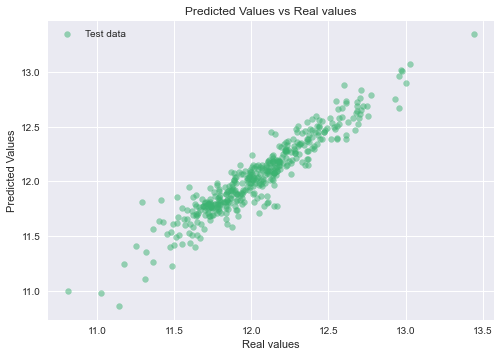

In [62]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

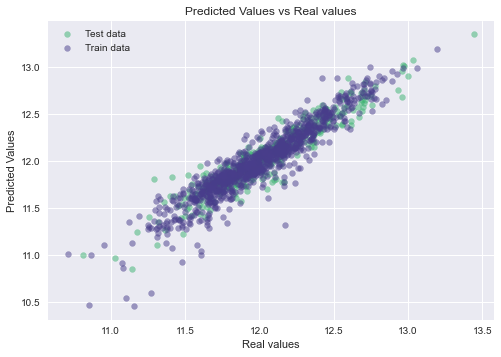

In [63]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.scatter(y_pred_train, y_train, color = 'darkslateblue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

#### [TEST] set

In [64]:
# TEST set
MAE_l = metrics.mean_absolute_error(y_test, y_pred)
MSE_l = metrics.mean_squared_error(y_test, y_pred)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_l = r2_score(y_test, y_pred)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_l)

MAE: 0.08881928343642258
MSE: 0.013890040438093894
RMSE: 0.118
R2 Score: 0.8881450403726652


#### [TRAIN] Cross-Validation

In [65]:
from sklearn.model_selection import cross_val_score
import math

cv_reg_model = LinearRegression() #Let's initialize the method 

cv_scores = cross_val_score(cv_reg_model, X_train, y_train,
                            cv=10, scoring='r2') # Let's define the cv and 

print('Cross Validation R2_score: {}'.format(cv_scores.round(2)))

cv_scores = np.mean(cv_scores).round(3)
print("\nAverage 10-Fold CV R2_score: {}".format(cv_scores))

Cross Validation R2_score: [0.92 0.89 0.87 0.88 0.85 0.82 0.9  0.87 0.84 0.86]

Average 10-Fold CV R2_score: 0.87


#### [TRAIN] set

In [66]:
# Let's calculate the metrics with our TRAIN dataset
y_predTrain = regressor.predict(X_train)

MAE_lTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_lTrain = r2_score(y_train, y_predTrain)

print('\n TRAIN metrics\n')
print('MAE:', MAE_lTrain)
print('MSE:', MSE_lTrain)
print('RMSE:', RMSE_lTrain)
print('R2 Score:', R2_lTrain)

print('\n CV- TRAIN metrics\n')
print('R2 Score:', cv_scores)

print('\n TEST metrics\n')
print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', RMSE_l)
print('R2 Score:', R2_l)


 TRAIN metrics

MAE: 0.0953377747347559
MSE: 0.017735586968937306
RMSE: 0.1331750238180467
R2 Score: 0.8769139775472241

 CV- TRAIN metrics

R2 Score: 0.87

 TEST metrics

MAE: 0.08881928343642258
MSE: 0.013890040438093894
RMSE: 0.11785601570600414
R2 Score: 0.8881450403726652


##  Ridge Regression

### Train the model

In [67]:
# Create ridge regression with three possible alpha values
regr_cv = RidgeCV(alphas=[0.1,0.5, 1.0, 10.0])
regr_cv


RidgeCV(alphas=array([ 0.1,  0.5,  1. , 10. ]))

In [68]:
X_train

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,1stFlrSF,BsmtFinSF1,LotArea,CentralAir,OverallCond
328,5,1111,1941,1,616,616,236,9084,2,6
1043,5,1040,1959,1,1040,1040,369,7560,1,5
318,8,1908,2002,2,967,993,0,14191,1,5
1208,5,1246,1959,1,1246,1246,340,7500,1,7
83,4,990,1994,0,990,990,588,8070,1,5
...,...,...,...,...,...,...,...,...,...,...
1095,7,1250,2006,2,625,625,0,4017,1,5
1130,8,1752,1988,2,559,1080,427,12134,1,7
1294,6,1912,1905,2,482,1221,0,10800,2,7
860,6,1721,1994,2,928,936,814,8462,1,5


In [69]:
# Fit the linear regression
model_cv = regr_cv.fit(X_train, y_train)
model_cv

RidgeCV(alphas=array([ 0.1,  0.5,  1. , 10. ]))

In [70]:
#View Best Model’s Alpha Value
model_cv.alpha_

10.0

In [71]:
regr_cv = RidgeCV(alphas=[10,15,18])

In [72]:
# Fit the linear regression
model_cv = regr_cv.fit(X_train, y_train)

#View Best Model’s Alpha Value
model_cv.alpha_

10

In [73]:
rr_ = Ridge(alpha = model_cv.alpha_)# higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles

rr_.fit(X_train, y_train)

Ridge(alpha=10)

In [74]:
X_test.head(2)

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,1stFlrSF,BsmtFinSF1,LotArea,CentralAir,OverallCond
51,5,1360,1955,2,384,1360,384,7134,1,5
1100,5,1343,1921,1,731,820,0,7681,1,6


In [75]:
y_pred = rr_.predict(X_test)

In [76]:
X_train.head(2)

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,1stFlrSF,BsmtFinSF1,LotArea,CentralAir,OverallCond
328,5,1111,1941,1,616,616,236,9084,2,6
1043,5,1040,1959,1,1040,1040,369,7560,1,5


In [77]:
y_pred_train = rr_.predict(X_train)

### Evaluate the model
#### Check it's coefficients and how we can interpret them.

In [78]:
accuracy = rr_.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.888220253515165


In [79]:
metrics_train(X_train, y_train, rr_)

,MAE,MSE,RMSE,R2,CV_R2
Train,0.095199,0.017751,0.133233,0.876807,0.87


In [80]:
metrics_test(X_test, y_test, rr_)

,MAE,MSE,RMSE,R2
Test,0.088841,0.013881,0.117816,0.88822


In [81]:
Allmetrics(rr_, X_train, y_train, X_test, y_test)

,MAE,MSE,RMSE,R2,CV_R2
Train,0.095199,0.017751,0.133233,0.876807,0.87
Test,0.088841,0.013881,0.117816,0.888220,NaN


#### Visualization of the predicted values vs real values

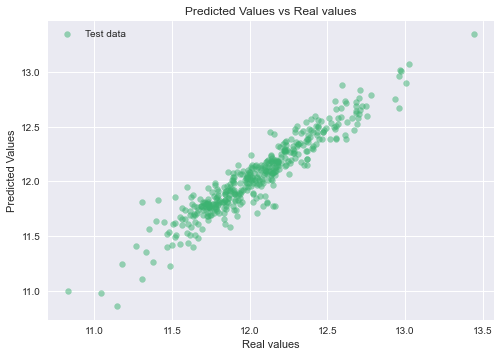

In [82]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

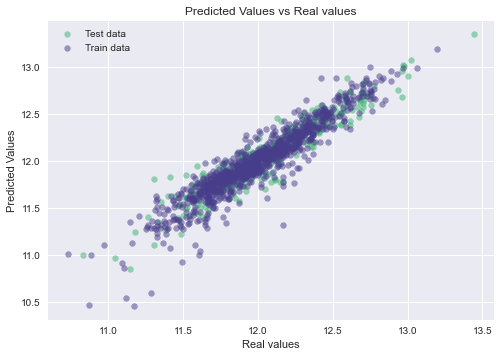

In [83]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.scatter(y_pred_train, y_train, color = 'darkslateblue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

#### [TEST] set

In [84]:
# TEST set
MAE_l = metrics.mean_absolute_error(y_test, y_pred)
MSE_l = metrics.mean_squared_error(y_test, y_pred)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_l = r2_score(y_test, y_pred)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_l)

MAE: 0.08884112414884278
MSE: 0.013880700542980793
RMSE: 0.118
R2 Score: 0.888220253515165


#### [TRAIN] Cross-Validation

In [85]:
from sklearn.model_selection import cross_val_score
import math

cv_reg_model = LinearRegression() #Let's initialize the method 

cv_scores = cross_val_score(cv_reg_model, X_train, y_train,
                            cv=10, scoring='r2') # Let's define the cv and 

print('Cross Validation R2_score: {}'.format(cv_scores.round(2)))

cv_scores = np.mean(cv_scores).round(3)
print("\nAverage 10-Fold CV R2_score: {}".format(cv_scores))

Cross Validation R2_score: [0.92 0.89 0.87 0.88 0.85 0.82 0.9  0.87 0.84 0.86]

Average 10-Fold CV R2_score: 0.87


#### [TRAIN] set

In [86]:
# Let's calculate the metrics with our TRAIN dataset
y_predTrain = regressor.predict(X_train)

MAE_lTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_lTrain = r2_score(y_train, y_predTrain)

print('\n TRAIN metrics\n')
print('MAE:', round(MAE_lTrain,3))
print('MSE:', round(MSE_lTrain,3))
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', round(R2_lTrain,3))

print('\n CV- TRAIN metrics\n')
print('R2 Score:', cv_scores)

print('\n TEST metrics\n')
print('MAE:', round(MAE_l,3))
print('MSE:', round(MSE_l,3))
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', round(R2_l,3))


 TRAIN metrics

MAE: 0.095
MSE: 0.018
RMSE: 0.133
R2 Score: 0.877

 CV- TRAIN metrics

R2 Score: 0.87

 TEST metrics

MAE: 0.089
MSE: 0.014
RMSE: 0.118
R2 Score: 0.888
